In [ ]:
#Importing Basic required libraries for computation and dataframe manipulation.
import numpy as np
import pandas as pd

In [ ]:
# Create New Variable and stores the dataset values as DataFrame.

loan_train = pd.read_csv('train_LP.csv')

In [ ]:
# Sample first 5 records of the dataset.

loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# The Shape of the dataset

print("Shape : ", loan_train.shape)

Shape :  (614, 13)


In [ ]:
# assign columns to a variable
loan_train_columns = loan_train.columns

# print the list of columns
loan_train_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Describe the numerical features (min, max, quantiles, count...etc)

loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Find and return, How many values are categorical type of features and their count.    

def explore_object_type(df ,feature_name):
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [ ]:
for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP002065    1
LP002959    1
LP002187    1
LP001734    1
LP002345    1
           ..
LP001844    1
LP002600    1
LP001896    1
LP001750    1
LP002862    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


In [ ]:
# missingno module to visualize the missing dataset

import missingno as msno

In [ ]:
# list of the missing values

loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

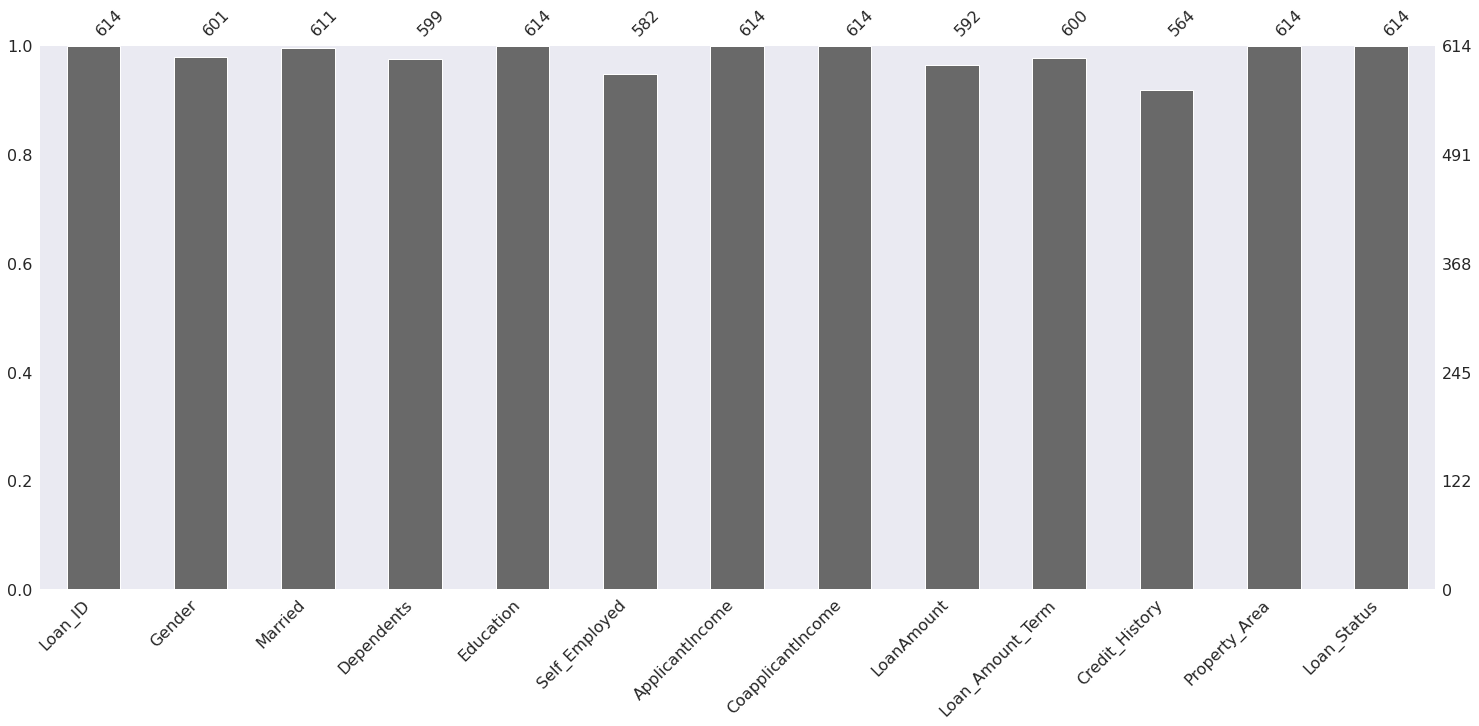

In [ ]:
msno.bar(loan_train)

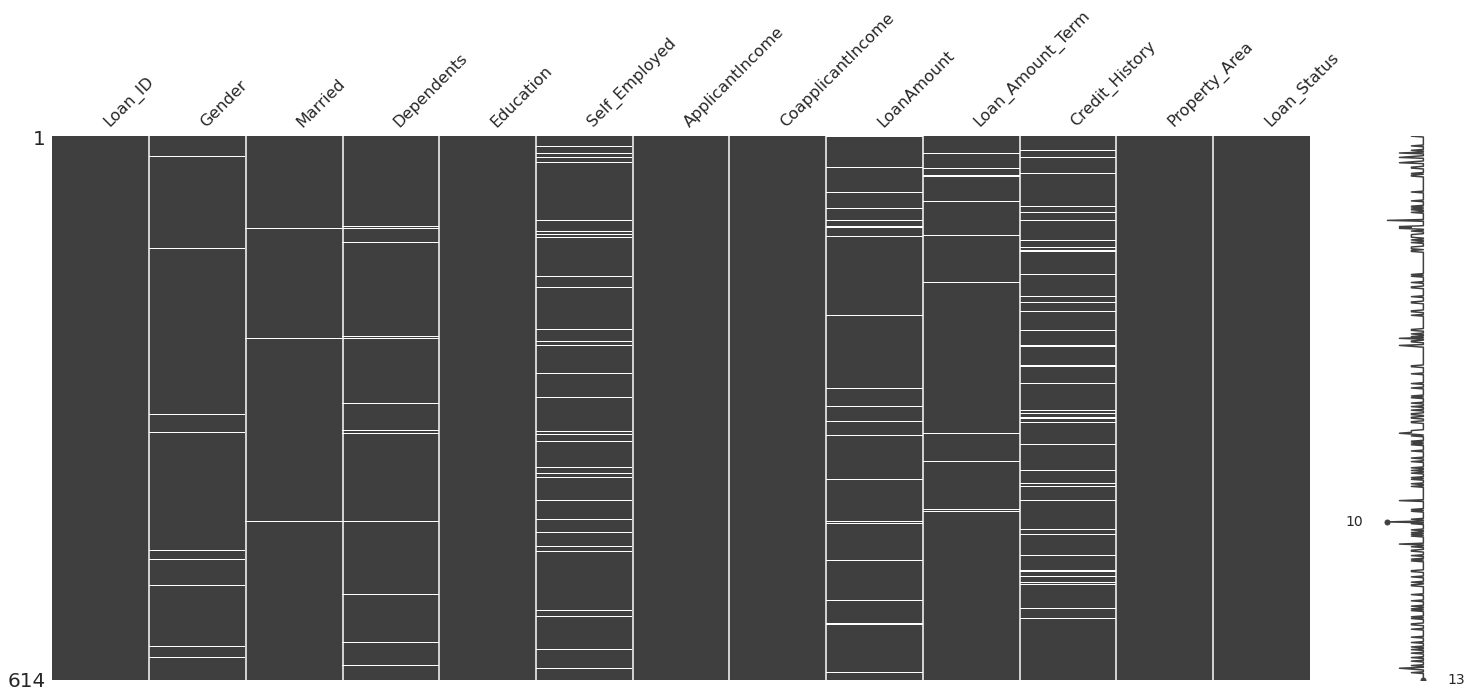

In [ ]:
msno.matrix(loan_train )


- From the plot we observe, there are too many columns missing with small amount of null values so we use `mean` amd `mode` to replace with `NaN` values.

In [ ]:
# filling the missing values of the numerical features.
# MODE
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace = True)

# MEAN
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace = True)

In [ ]:
# convert Categorical variable to Numerical values with replace function.

loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})

loan_train.Property_Area = loan_train.Property_Area.replace({"Urban": 2, "Semiurban": 1, "Rural" : 0})

loan_train.Education = loan_train.Education.replace({"Graduate": 1, "Not Graduate": 0})

In [ ]:
# Filling the missing value for other columns after replacing Categorical variable to Numerical values

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)


In [ ]:
"""
# convert Categorical variable to Numerical values with label encoding

from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
"""

"\n# convert Categorical variable to Numerical values with label encoding\n\nfrom sklearn.preprocessing import LabelEncoder\nfeature_col = ['Property_Area','Education', 'Dependents']\nle = LabelEncoder()\nfor col in feature_col:\n    loan_train[col] = le.fit_transform(loan_train[col])\n"

In [ ]:
# Importing visualization module to gather information from the dataset(matplotlib and seaborn)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('dark')

In [ ]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,2,1


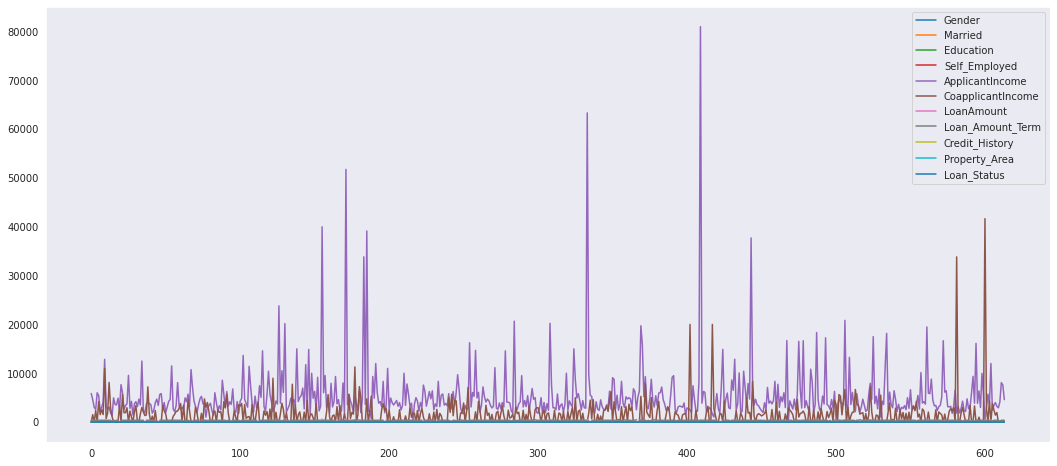

In [ ]:
# plot of overall dataset.

loan_train.plot(figsize=(18, 8))

plt.show()

In [ ]:
# histogram plot for variable whose have continuous range of values.
# if there is skewness in our data
# To reduce right skewness, take roots or logarithms or reciprocals.
# To reduce left skewness, take squares or cubes or higher powers.

def plots(col):
  plt.figure(figsize=(18, 6))
  plt.subplot(1, 2, 1)
  loan_train[col].hist(bins=10)
  plt.title(col)

  plt.subplot(1, 2, 2)
  plt.grid()
  plt.hist(np.log(loan_train[col]))
  plt.title("Log "+col)

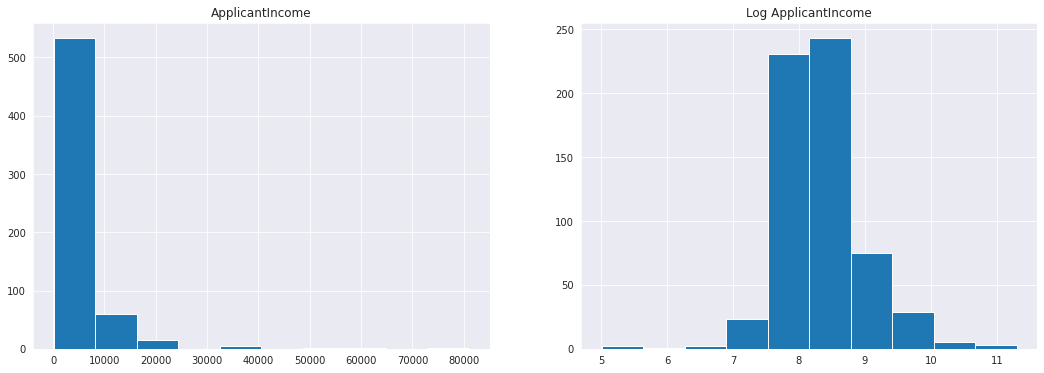

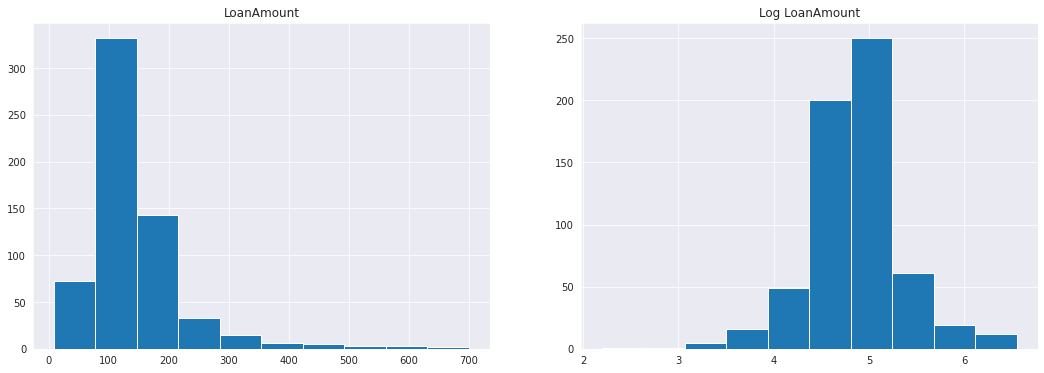

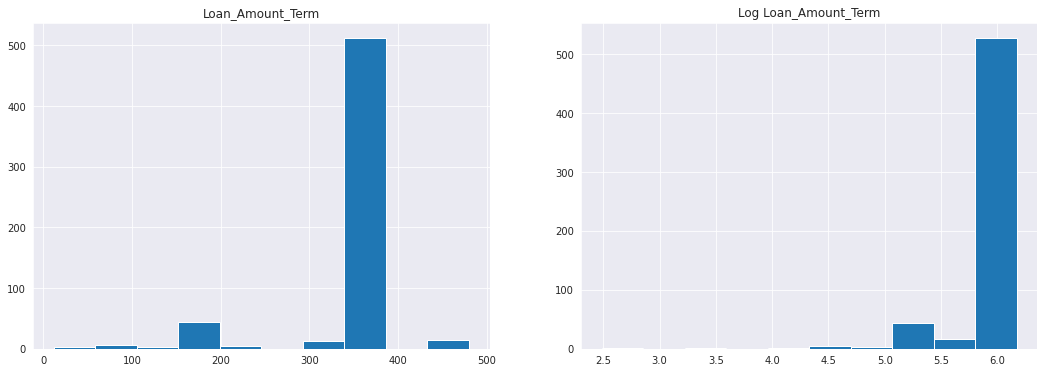

In [ ]:
cols = ['ApplicantIncome','LoanAmount','Loan_Amount_Term']

for col in cols:
  plots(col)

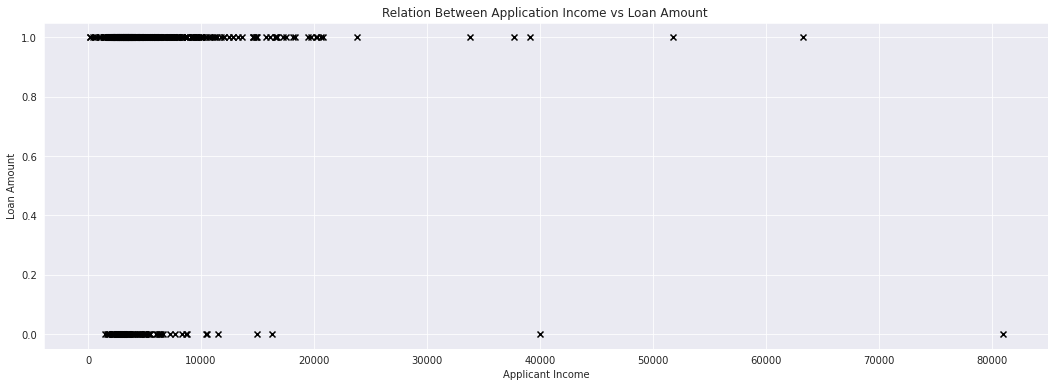

In [ ]:
# Scatter plot to identify the relationship between the Applicant Income and Loan Amount

plt.figure(figsize=(18, 6))
plt.title("Relation Between Application Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['Credit_History'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

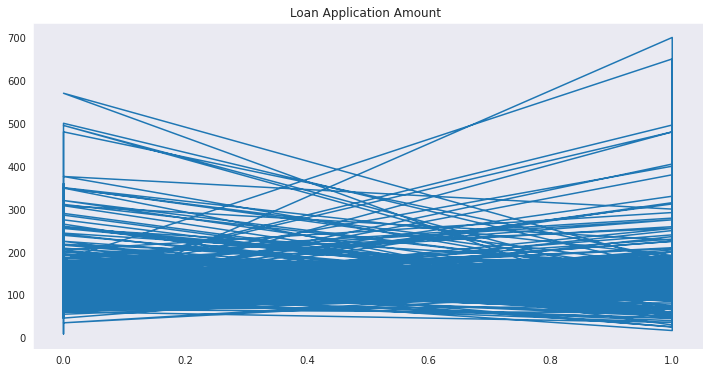

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

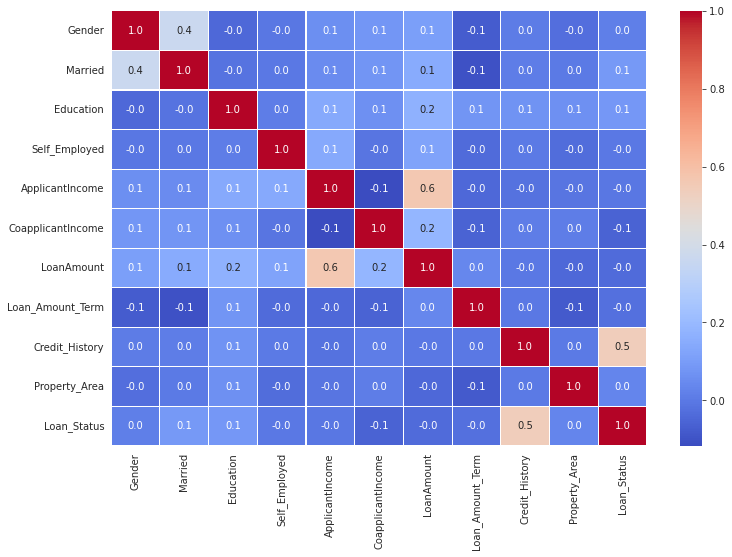

In [ ]:
# Finding the relation in the dataset(correlation)

plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [ ]:
# import ML model from sklearn package.(Decision Tree is the Classification model)

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
# Declaring the DT model

model = LogisticRegression()

In [ ]:
# Selected features for training

train_features = ['Credit_History', 'Education', 'Gender', 'ApplicantIncome', 'Property_Area']

# Spliting the class attribute from the dataset.
 
x = loan_train[train_features].values
y = loan_train['Loan_Status'].values

In [ ]:
# Importing function to split dataset for test and train 

from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset with 20% of test size

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=25)

In [ ]:
x_train[0]

array([1.000e+00, 0.000e+00, 1.000e+00, 3.399e+03, 2.000e+00])

In [ ]:
# Fitting Decision model to our training data.

model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predict the model for testin data

predicted = model.predict(x_test)


In [ ]:
# check the coefficeints of the trained model
print('Coefficient of model :', model.coef_)

Coefficient of model : [[ 3.12839655e+00  6.07058433e-01 -2.43923912e-01  6.63918137e-06
   1.02047056e-01]]


In [ ]:
# check the intercept of the model
print('Intercept of model',model.intercept_)

Intercept of model [-2.22587053]


In [ ]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))


accuracy_score overall : 0.8105906313645621
accuracy_score percent : 81.06


In [ ]:

# predict the target on the test dataset
predict_test = model.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = model.score(x_test, y_test)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))


accuracy_score overall : 0.8048780487804879
accuracy_score percent : 80.49


In [ ]:
# Importing the pickle to deploy the model

import pickle as pkl

In [ ]:
# save the model to system

# File name 
filename = 'logistic_model.pkl'

# wb means write as binary
pkl.dump(model, open(filename, 'wb'))

In [ ]:
train_features = ['Credit_History', 'Education', 'Gender', 'ApplicantIncome', 'Property_Area']

# Loading the deployed model from the system(disk) to variable
# rb means read as binary

load_model = pkl.load(open('logistic_model.pkl', 'rb'))

# Predicting for random data

dta = np.array([1, 0, 0, 2000, 0])
load_model.predict(dta.reshape(1, -1))

array([1])